<a href="https://colab.research.google.com/github/KanoonGammy/Applied_ML_HW/blob/main/Homework2_SGD_MiniBGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np

In [113]:
x = np.array([[0,1,2,4],[2,6,3,6],[3,8,4,8]]) #x1, x2, x3 ,x4
y = np.array([1,1,4])
x_b = np.c_[np.ones((len(x),1)),x]

# Stochastic Gradient Descent

In [114]:
# Cost funtion of Stochastic Gradient Descent
def cost_function_SGD(theta, x, y, N):
    mrg_xy = np.c_[x, y] # merge x(with bias) and y
    RanN = np.random.randint(0, mrg_xy.shape[0]-1) # random integer
    y_hat = theta.T.dot(mrg_xy[RanN][:-1].reshape(-1,1))
    diff = y_hat - mrg_xy[RanN][-1]
    c = (diff)**2

    return c

In [115]:
def stochastic_gradient_descent(alpha, lamda_ , x, y, ep=0.000000000001, max_iter=10000):
    converged = False
    iter = 0
    N = x.shape[0] # N = row
    t = 1

    # initial theta
    theta = np.random.random((x.shape[1],1))
    print(f"Initial theta: {theta}")

    # total error, J(theta)
    J = cost_function_SGD(theta, x, y, N)
    print("First J:", J)

    # Iterate Loop
    while not converged:
        mrg_xy = np.c_[x, y] # rebuild
        RanN = np.random.randint(0, mrg_xy.shape[0]-1) # random integer
        y_hat = theta.T.dot(mrg_xy[RanN][:-1].reshape(-1,1))

        diff = y_hat - mrg_xy[RanN][-1]
        stoch = (x[RanN] * diff).reshape(-1,1) # x_ij * diff

        alpha_t = alpha / (1+(alpha*lamda_*t)) #alpha t +1

        theta = theta - alpha_t * (stoch) # update theta

        assert theta.shape == (x.shape[1],1) #This line makes sure that the shape of theta is still be the same.

        # error
        J2 = cost_function_SGD(theta, x, y, N) # use updated theta

        if abs(J-J2) <= ep:
            print("       Converged, iterations: ", iter, "/", max_iter)
            converged = True

        J = J2   # update error s
        iter += 1  # update iter
        t += 1

        if iter == max_iter:
            print('       Max iterations exceeded!')
            converged = True

    #print("End converged iter = ",iter)
    return theta

Initial theta: [[0.36611881]
 [0.60871486]
 [0.62953957]
 [0.49845502]
 [0.99788179]]
First J: [[140.26711113]]
       Converged, iterations:  702 / 100000
Theta =  [[ 0.23883565]
 [ 0.31753262]
 [-0.22569917]
 [ 0.09829758]
 [ 0.19756691]]
y predict =  [[0.23883565]
 [0.62653359]
 [1.01423152]
 [1.40192945]
 [1.78962739]
 [2.17732532]
 [2.56502326]
 [2.95272119]
 [3.34041912]
 [3.72811706]
 [4.11581499]
 [4.50351292]
 [4.89121086]
 [5.27890879]
 [5.66660673]
 [6.05430466]
 [6.44200259]
 [6.82970053]
 [7.21739846]
 [7.6050964 ]]


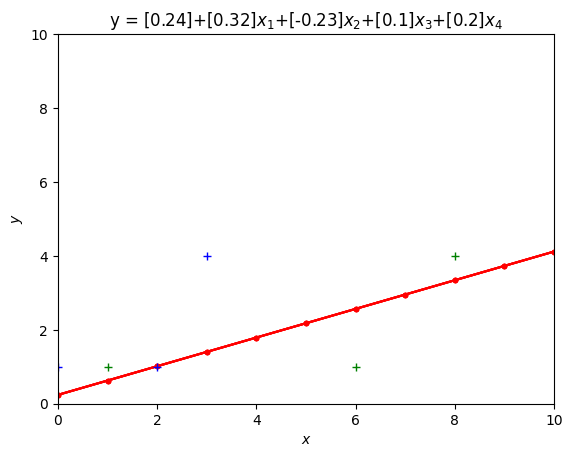

In [116]:
if __name__ == '__main__':

    alpha = 0.01 # learning rate
    lambda_ = 0.1

    #Training process
    theta = stochastic_gradient_descent(alpha, lambda_, x_b, y, ep=0.00000000000001, max_iter=100000)
    print ("Theta = ", theta)

    #predict trainned x
    xtest = np.array([[i,j,k,l] for i,j,k,l in zip(range(20), range(20),range(20),range(20))])
    xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
    y_p = xtest_b.dot(theta)
    print("y predict = ",y_p)

    import matplotlib.pyplot as plt
    plt.title("y = "+str(np.round(theta[0],2))+"+"+str(np.round(theta[1],2))+r"$x_1$"+"+"+str(np.round(theta[2],2))+r"$x_2$"+"+"+str(np.round(theta[3],2))+r"$x_3$"+"+"+str(np.round(theta[4],2))+r"$x_4$")
    plt.plot(xtest, y_p,"r.-")
    plt.plot(x[:,0], y, "b+")
    plt.plot(x[:,1], y, "g+")

    plt.axis([0,10,0,10])
    plt.xlabel(r'$x$')

    plt.ylabel(r'$y$')
    plt.show()

# Mini Batch Gradient Descent

In [117]:
# Cost funtion of Mini-Batch Gradient Descent
def cost_function_miniBGD(theta, x, y, N):
    mrg_xy = np.c_[x, y]
    np.random.shuffle(mrg_xy)
    mrg_xy = mrg_xy[:N]

    c = 1/(2*N) * sum([(theta.T.dot(mrg_xy[i,:-1]) - mrg_xy[i][-1])**2 for i in range(N)])
    print(theta)
    x = mrg_xy[:,:-1].reshape(-1, x.shape[1])
    y = mrg_xy[:,-1].reshape(-1,1)
    y_hat = x.dot(theta)
    diff = y_hat - y
    grad = x.T.dot(diff)

    return c, grad

In [118]:
def mini_batch_gradient_descent(alpha, x, y, N,ep=0.001, max_iter=10000):
  converged = False
  iter = 0

  # initial theta
  theta =  np.random.random((x.shape[1],1))
  print("Init theta.shape = ",theta.shape)

  # total error, J(theta)
  J,grad = cost_function_miniBGD(theta, x, y, N)

  # Iterate Loop
  while not converged:

    theta = theta - alpha * (1/N) * (grad)
    # print(theta.shape)
    assert theta.shape == (x.shape[1],1) #This line makes sure that the shape of theta is still be the same.

    # error
    J2,grad = cost_function_miniBGD(theta, x, y, N)

    if abs(J-J2) <= ep:
        print("       Converged, iterations: ", iter, "/", max_iter)
        converged = True

    J = J2   # update error s
    iter += 1  # update iter

    if iter == max_iter:
        print('       Max iterations exceeded!')
        converged = True

  #print("End converged iter = ",iter)
  return theta

Init theta.shape =  (5, 1)
[[0.53114661]
 [0.74494979]
 [0.99794556]
 [0.63813749]
 [0.27446585]]
[[ 0.45914127]
 [ 0.57248223]
 [ 0.52351592]
 [ 0.37914844]
 [-0.24351225]]
[[ 0.45064069]
 [ 0.54348407]
 [ 0.44735295]
 [ 0.34281517]
 [-0.31617879]]
[[ 0.44228065]
 [ 0.51995308]
 [ 0.38016543]
 [ 0.31432959]
 [-0.37314995]]
[[ 0.4383664 ]
 [ 0.51554666]
 [ 0.36352409]
 [ 0.30600892]
 [-0.38979128]]
[[ 0.43794326]
 [ 0.50324783]
 [ 0.33235387]
 [ 0.29901324]
 [-0.40378265]]
[[ 0.43961277]
 [ 0.49411877]
 [ 0.31120073]
 [ 0.29778772]
 [-0.40623369]]
[[ 0.44225042]
 [ 0.48660861]
 [ 0.29506299]
 [ 0.29930794]
 [-0.40319324]]
[[ 0.44531159]
 [ 0.47996251]
 [ 0.28150891]
 [ 0.30210723]
 [-0.39759467]]
[[ 0.44853309]
 [ 0.47381207]
 [ 0.26935431]
 [ 0.30547501]
 [-0.3908591 ]]
[[ 0.45501616]
 [ 0.49617907]
 [ 0.32705447]
 [ 0.33432509]
 [-0.33315895]]
[[ 0.46326565]
 [ 0.5076988 ]
 [ 0.36218333]
 [ 0.35850388]
 [-0.28480137]]
[[ 0.45615706]
 [ 0.48751414]
 [ 0.30461307]
 [ 0.33419437]
 [-0.3

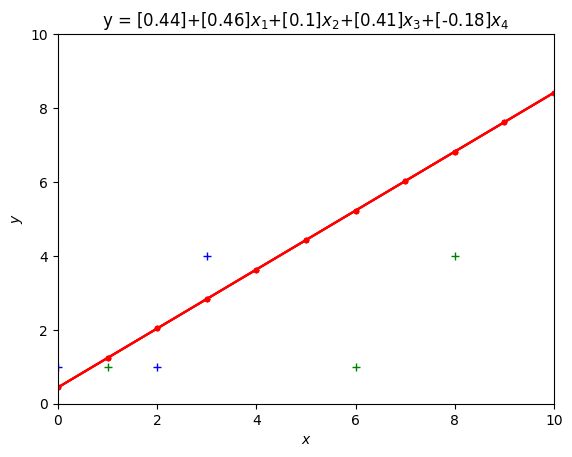

In [119]:
if __name__ == '__main__':
    alpha = 0.01 # learning rate
    N = 2
    theta = np.random.random((x.shape[1], 1))

    #Training process
    theta = mini_batch_gradient_descent(alpha, x_b, y, N, ep=0.00000000000001, max_iter=100)
    print ("Theta = ", theta)

    #predict trainned x
    xtest = np.array([[i,j,k,l] for i,j,k,l in zip(range(20), range(20), range(20), range(20))])
    xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
    y_p = xtest_b.dot(theta)
    print("y predict = ",y_p)

    import matplotlib.pyplot as plt
    plt.title("y = "+str(np.round(theta[0],2))+"+"+str(np.round(theta[1],2))+r"$x_1$"+"+"+str(np.round(theta[2],2))+r"$x_2$"+"+"+str(np.round(theta[3],2))+r"$x_3$"+"+"+str(np.round(theta[4],2))+r"$x_4$")
    plt.plot(xtest, y_p,"r.-")
    plt.plot(x[:,0], y, "b+")
    plt.plot(x[:,1], y, "g+")

    plt.axis([0,10,0,10])
    plt.xlabel(r'$x$')

    plt.ylabel(r'$y$')
    plt.show()